# Homework 4 - genome read mapping

In this homework assignment we'll try out some of the sequence alignment strategies we talked about in class. First we'll code the brute force search approach. Next we'll implement a trie-based sequencing read alignment tool using basic Python functions. The objective of this tool is to align short DNA sequencing reads to a given reference genome. To accomplish this, you will first construct a trie from the reads using a 'trie', make up of dictionaries as the primary data structure. This trie will hopefully facilitate more efficient searching and matching of the input reads.



### Load up the genome

We will be working with the Lambda phage genome, which is approximately 48,000 bases long. It is probably the most sequenced genome in the world since it is used for machine calibration on all Illumina machines. If you accidentally mess up the genome sequence later on, you can rerun this cell.

In [ ]:
import time # we'll use this for some timing example below

fasta = open("lambda.fasta")
lambda_header = fasta.readline()
lambda_genome = ""
for line in fasta:
    lambda_genome += line.strip()


### Brute force search - 3 points

Lets start with the simplier approach we talked about in class. Write a python function that takes a string, **genome**, that we will search in, and **read**, a pretend sequencing read we'll be looking for. Return **a list with all positions** within the genome where we can find an exact match for this sequencing read. If there are no matches, return an empty list. Positions should be zero-based (the first position in the genome is position 0, then 1, etc). 

In [ ]:
# a reminder: don't change the name or parameters
def find_brute_force_read_mapping_positions(genome, read):
    """
    Finds all occurrences of a given read string within a genome string using a brute-force approach.

    Parameters:
    genome (str): A string representing the genome to search within.
    read (str): A string representing the read to search for.

    Returns:
    A list of integers representing the starting positions of all occurrences of the read string within the genome string.
    The list will be empty if there are no hits.
    """
    locations = []
    # your code here
    return locations


#### Try timing testing your code

Below you can run a simple test of your code using the lambda genome you loaded above. It runs your lookup code for 1000 iterations (you can change that) looking for a read we know is in the genome. It then splits out some timing information about the approximate time it takes to execute. This is just an exercise to see play around with timing a function.

In [ ]:
def test_BF_read_mapping_time(genome, read):
    start_time = time.time()
    
    # lets try looking for this read 1000 times to see how long it takes
    for i in range(0,1000):
        locations = find_brute_force_read_mapping_positions(genome, read)
    end_time = time.time()
    
    print('Total read search time:', end_time - start_time, 'seconds')

fake_read_but_real_sequence = "CAGACGCTGCTGCGTGTGGATGAGGCCATC"

test_BF_read_mapping_time(lambda_genome,fake_read_but_real_sequence)


### Trie implementation - 3 points

Now that we have a function to find read-mapping positions using a brute force approach, lets try something that's hopefully a little faster. Let's implement the trie structure we saw in class on Tuesday. You should use a nested dictionary approach. A nested dictionary is a dictionary where the value is another dictionary. This means you'll create a trie using dictionaries where the nucleotide keys looks-up the next layer of the graph (which is itself a dictionary), making edges between letters in your sequence. A picture will hopefully be helpful.

Let's say we've added the following sequences:

[AAA,
AAC,
AAG,
AAT,
AC,
AG,
AT,
C,
G,
TA,
TC,
TG,
TT]

You'd see something like the trie on the left:

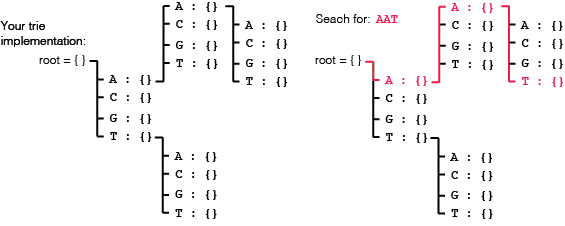

You'll first need to make a function that takes in **read sequences** and creates the trie. We'll talk about using the reference instead to build trees in the second lecture, but here **we're going to use the reads to create the trie**. We'd recommend you start with an empty dictionary, taking turns with each read to add it to the tree, and then return the resulting dictionary. 

If you searched for the sequence **AAT** you can see the resulting process on the right above, where we traverse the dictionary of dictionaries looking for a match in the reads for this section of the genome.

One thing we're leaving out of the picture is handling reads where one read is a subset (substring) of another. For full credit you should handle these situations too. 


#### Example results

if you called you version of build_trie using the example sequences above:
```

my_new_trie = build_trie(['AAA','AAC','AAG','AAT','AC','AG','AT','C','G','TA','TC','TG','TT'])
```

You should be able to 'index' (use a key to find an entry) into the resulting tree and not cause an error:
```
my_new_trie['A']['A']['A']
```

We'll use this indexing approach to find read alignment positinos in the genome later in the code


#### Fill in the build_trie function below:

In [ ]:
def build_trie(sequences):
    """
    Constructs a trie data structure from a list of DNA sequences.

    Parameters:
    sequences (List[str]): A list of DNA sequences represented as strings.

    Returns:
    A dictionary representing the root of the constructed trie data structure.
    Each key in the dictionary corresponds to a nucleotide in the DNA sequence,
    and the value associated with each key is a dictionary representing the next level
    of the trie. For full credit the '$' key is used to indicate the end of a sequence.
    """
    trie = {}
    # your code here
    return trie


### get_all_read_positions - 3 points

Now lets put this all together. We're going to write a function that takes the trie you've created above, and marches down the genome, position by position, finding alignment locations for each read. This function should output a dictionary, with keys set to any read you find in the reference, and the dictionary value as a list with the positions for each alignment 'hit'. 

```
reads = ['banana','pan','and','nab','antenna','bandana','ananas','nana']
genome = 'panamabananas'
trie = build_trie(reads)
print(get_all_read_positions(trie,genome))
```

Should return something like this (from the results in class):
```
{'pan': [0], 'banana': [6], 'ananas': [7], 'nana': [8]}
```

In [ ]:

def get_all_read_positions(trie, genome):
    read_positions = {}
    # your code here
    return(read_positions)
